### Index

1. [Importing the libraries](#1.-Importing-the-libraries)
1. [Reading the dataset](#2.-Reading-the-dataset)

## 1. Importing the libraries

In [1]:
from glob import glob
import pandas as pd
import numpy as np

# Data visualization
from matplotlib import pyplot as plt

# Preprocessing and Training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2. Reading the dataset

In [2]:
# Browsing the data files
files = glob('data/*.csv')
files

['data/test.csv',
 'data/SubmissionFormat.csv',
 'data/training.csv',
 'data/labels.csv']

In [3]:
# Reading the training dataset
training_data = pd.read_csv('data/training.csv')

# Reading the labels dataset
training_labels = pd.read_csv('data/labels.csv')

In [4]:
# Assigning labels to the training data
training_data = training_data.merge(training_labels, on='id')

## 3. Exploratory Data Analysis

In [5]:
# Looking the dataset
training_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# Rows and columns in dataset
training_data.shape

(59400, 41)

In [7]:
# Dropping unnecessary columns
training_data = training_data.drop(['id', 'payment_type', 
                                    'funder', 'installer',
                                    'water_quality', 'quantity_group',
                                    'source', 'waterpoint_type'], axis=1)

### 3.1 Summary statistics

In [8]:
# Checking the data type
training_data.dtypes

amount_tsh               float64
date_recorded             object
gps_height                 int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
quality_group             object
quantity                  object
source_type               object
source_cla

**Column `date_recorded` has incorrect dtype.** 

In [9]:
# Correcting the dtype of column
training_data['date_recorded'] = pd.to_datetime(training_data.date_recorded)

In [10]:
# Columns that contain null values
training_data.columns[training_data.isnull().sum() > 0].tolist()

['subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

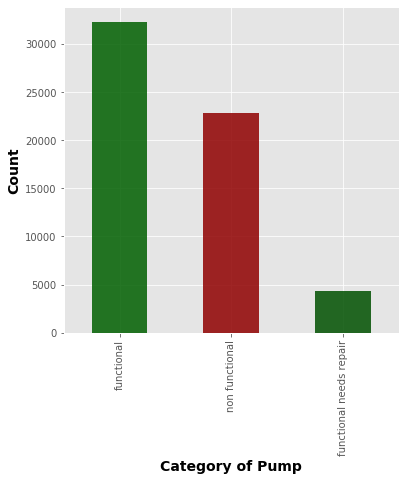

In [11]:
# Distribution of categories

def plt_category(df, col_name):
    font_style = {'size':14, 'weight':'bold', 'color':'#000000'}
    df[col_name].value_counts().plot(kind='bar',
                                     color=['#005f00', '#8f0000', '#005000'], 
                                     alpha=0.85)
    plt.xlabel('Category of Pump', fontdict=font_style)
    plt.ylabel('Count', fontdict=font_style)
    plt.show()


# Plot style
plt.style.use('ggplot')
# Plot size
plt.rcParams['figure.figsize'] = [6, 6]

plt_category(training_data, col_name='status_group')